Epoch 1/20


C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 1.6078e-04 - loss: 7.8291 - val_accuracy: 0.0000e+00 - val_loss: 7.9030
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 36s 103ms/step - accuracy: 5.1869e-04 - loss: 7.7805 - val_accuracy: 0.0000e+00 - val_loss: 8.0258
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 36s 103ms/step - accuracy: 0.0014 - loss: 7.7554 - val_accuracy: 0.0000e+00 - val_loss: 8.1434
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 104ms/step - accuracy: 5.3141e-04 - loss: 7.7364 - val_accuracy: 0.0000e+00 - val_loss: 8.2480
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 36s 103ms/step - accuracy: 0.0022 - loss: 7.7136 - val_accuracy: 0.0000e+00 - val_loss: 8.3506
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 36s 103ms/step - accuracy: 0.0010 - loss: 7.7080 - val_accuracy: 0.0000e+00 - val_loss: 8.4481
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 36s 103ms/step - accuracy: 9.4382e-04 - loss: 7.6958 - val_accuracy: 0.0000e+00 - val_loss: 8.5406
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 36s 103ms/

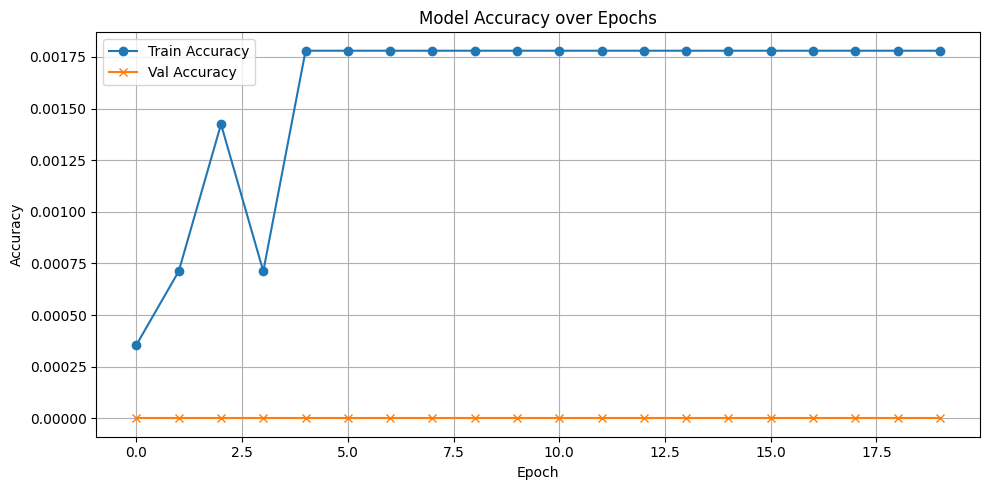

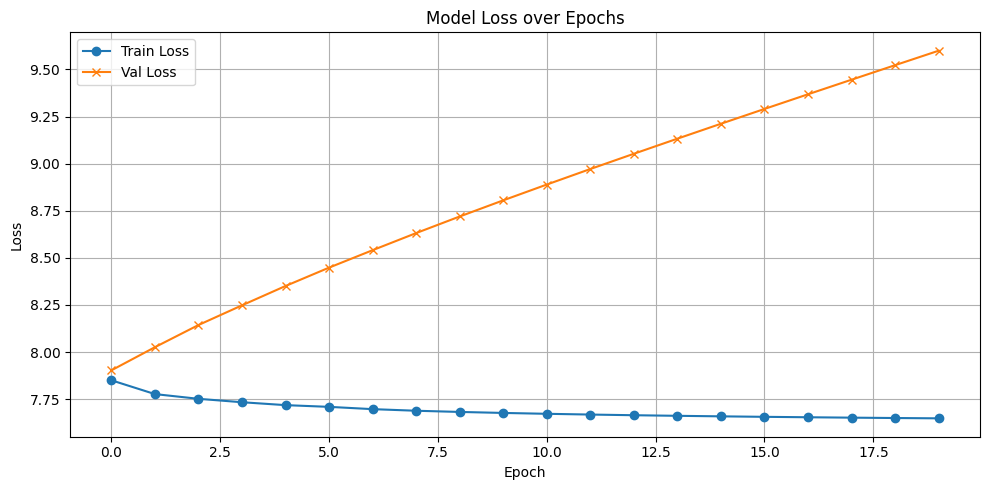

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("C:/Users/sagni/Downloads/Emotion Chatbot/train.csv")

# Tokenize Context
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(df['Context'])

X = tokenizer.texts_to_sequences(df['Context'])
X = pad_sequences(X, padding='post')

# Encode Responses
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Response'])
y = tf.keras.utils.to_categorical(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=X.shape[1]),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_test, y_test))

# Save the model
model.save("C:/Users/sagni/Downloads/Emotion Chatbot/train.h5")

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
